<a href="https://colab.research.google.com/github/Tatha-437/WORLD-SUICIDE-ANALYSIS/blob/main/Global_Suicide_Rates_Visualization_CAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
from plotly import tools
 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [ ]:
dataset = pd.read_csv('master.csv')
worldmap=pd.read_csv("concap.csv")

In [ ]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# List of Countries in the Dataset
unique_country = dataset['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

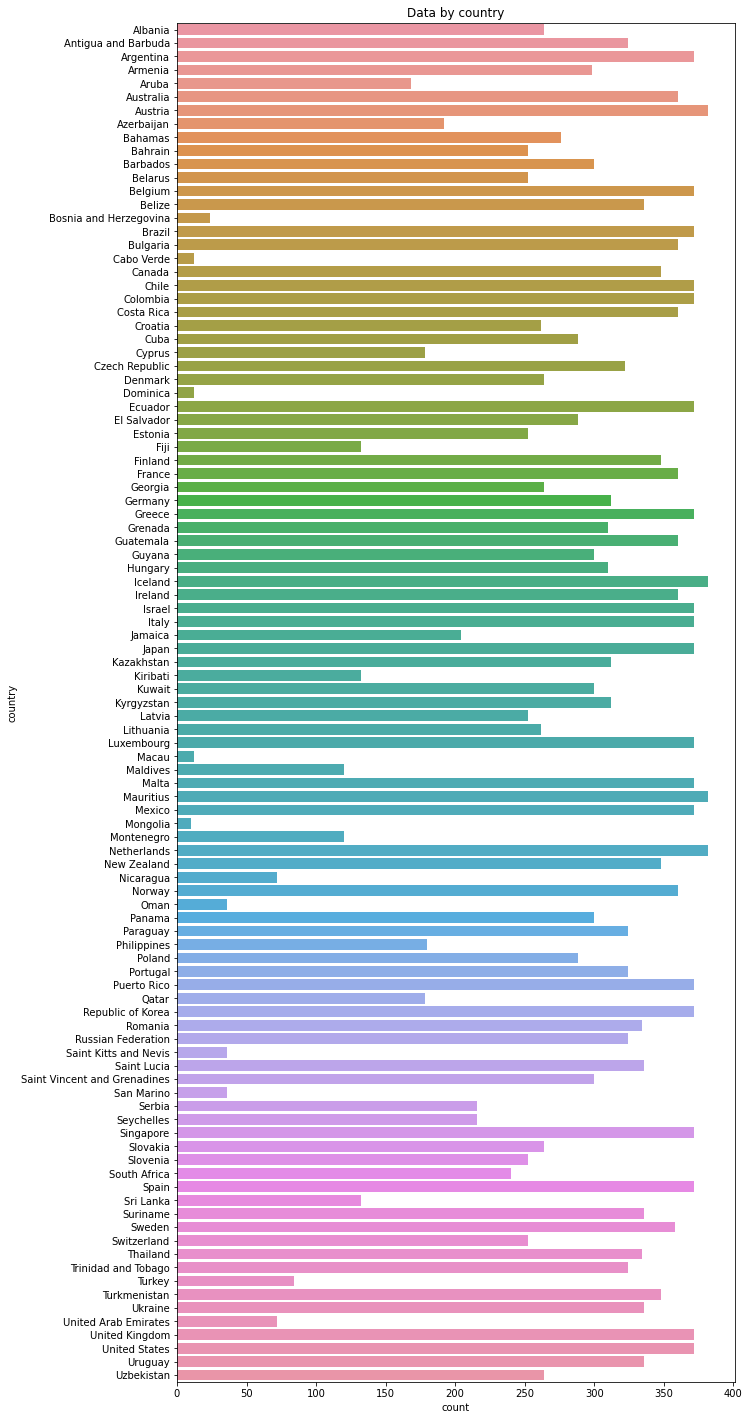

In [ ]:
###Let's check for country
alpha = 1.0
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

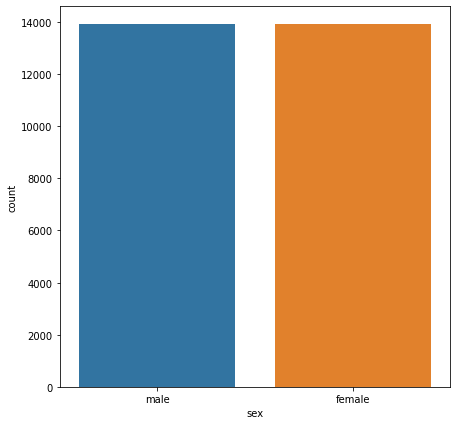

In [ ]:
# Between Genders Male vs Female
plt.figure(figsize=(7,7))
sex = sns.countplot(x='sex',data = dataset)

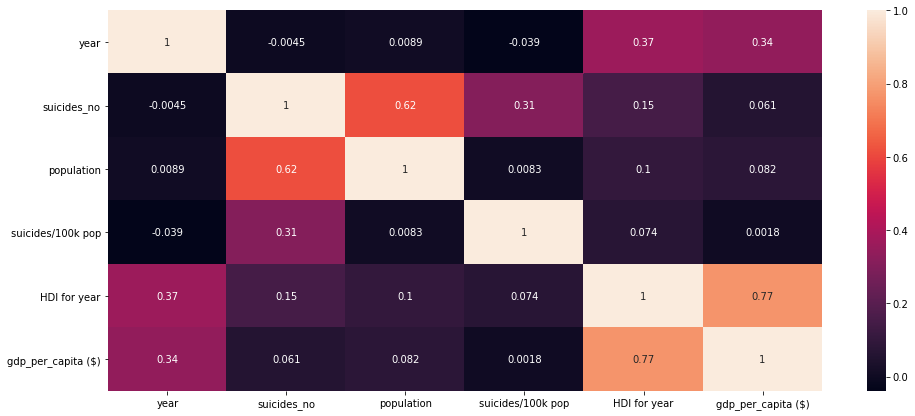

In [ ]:
# Corelation between the Data
plt.figure(figsize=(16,7))
cor = sns.heatmap(dataset.corr(), annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



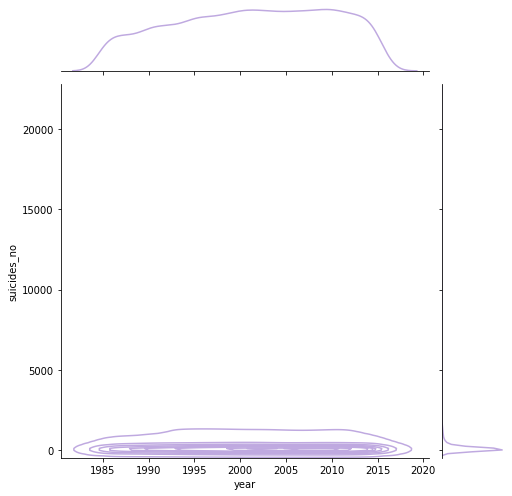

In [ ]:
g = sns.jointplot(dataset.year,dataset.suicides_no, kind="kde", color="#bfa9e0" ,size=7)
plt.savefig('graph.png')

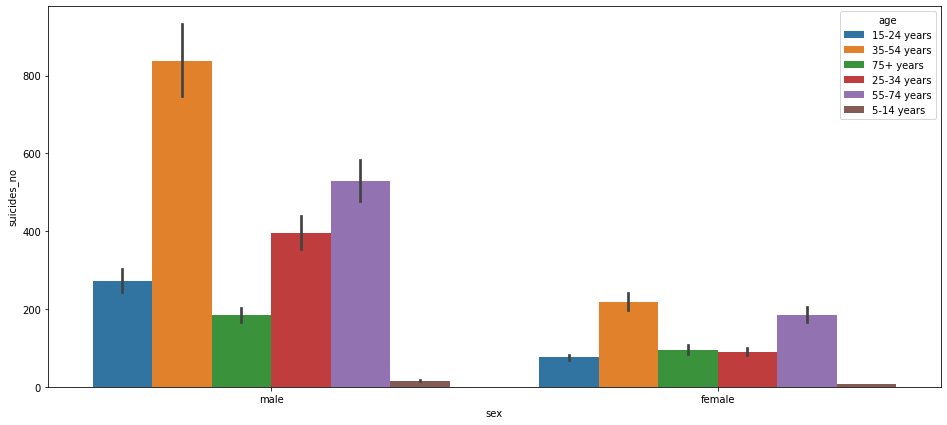

In [ ]:
# Visualizing which age of people Suicide the most
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = dataset)

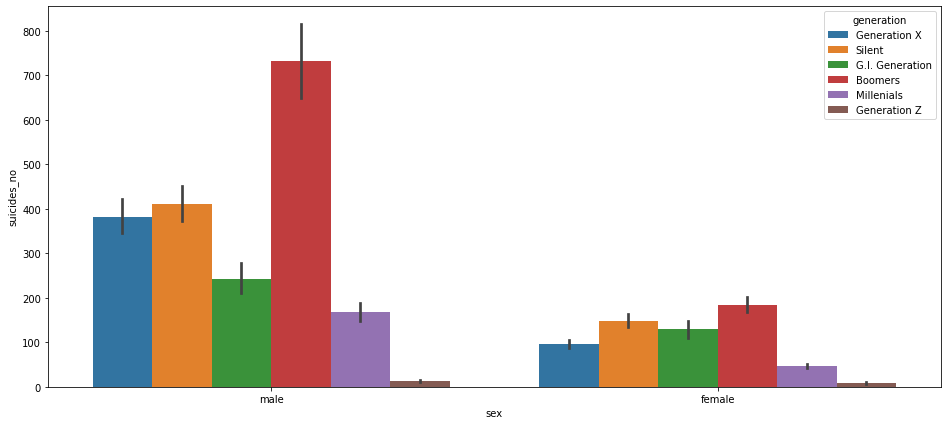

In [ ]:
# Visualizing which Generation of people Suicide the most
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



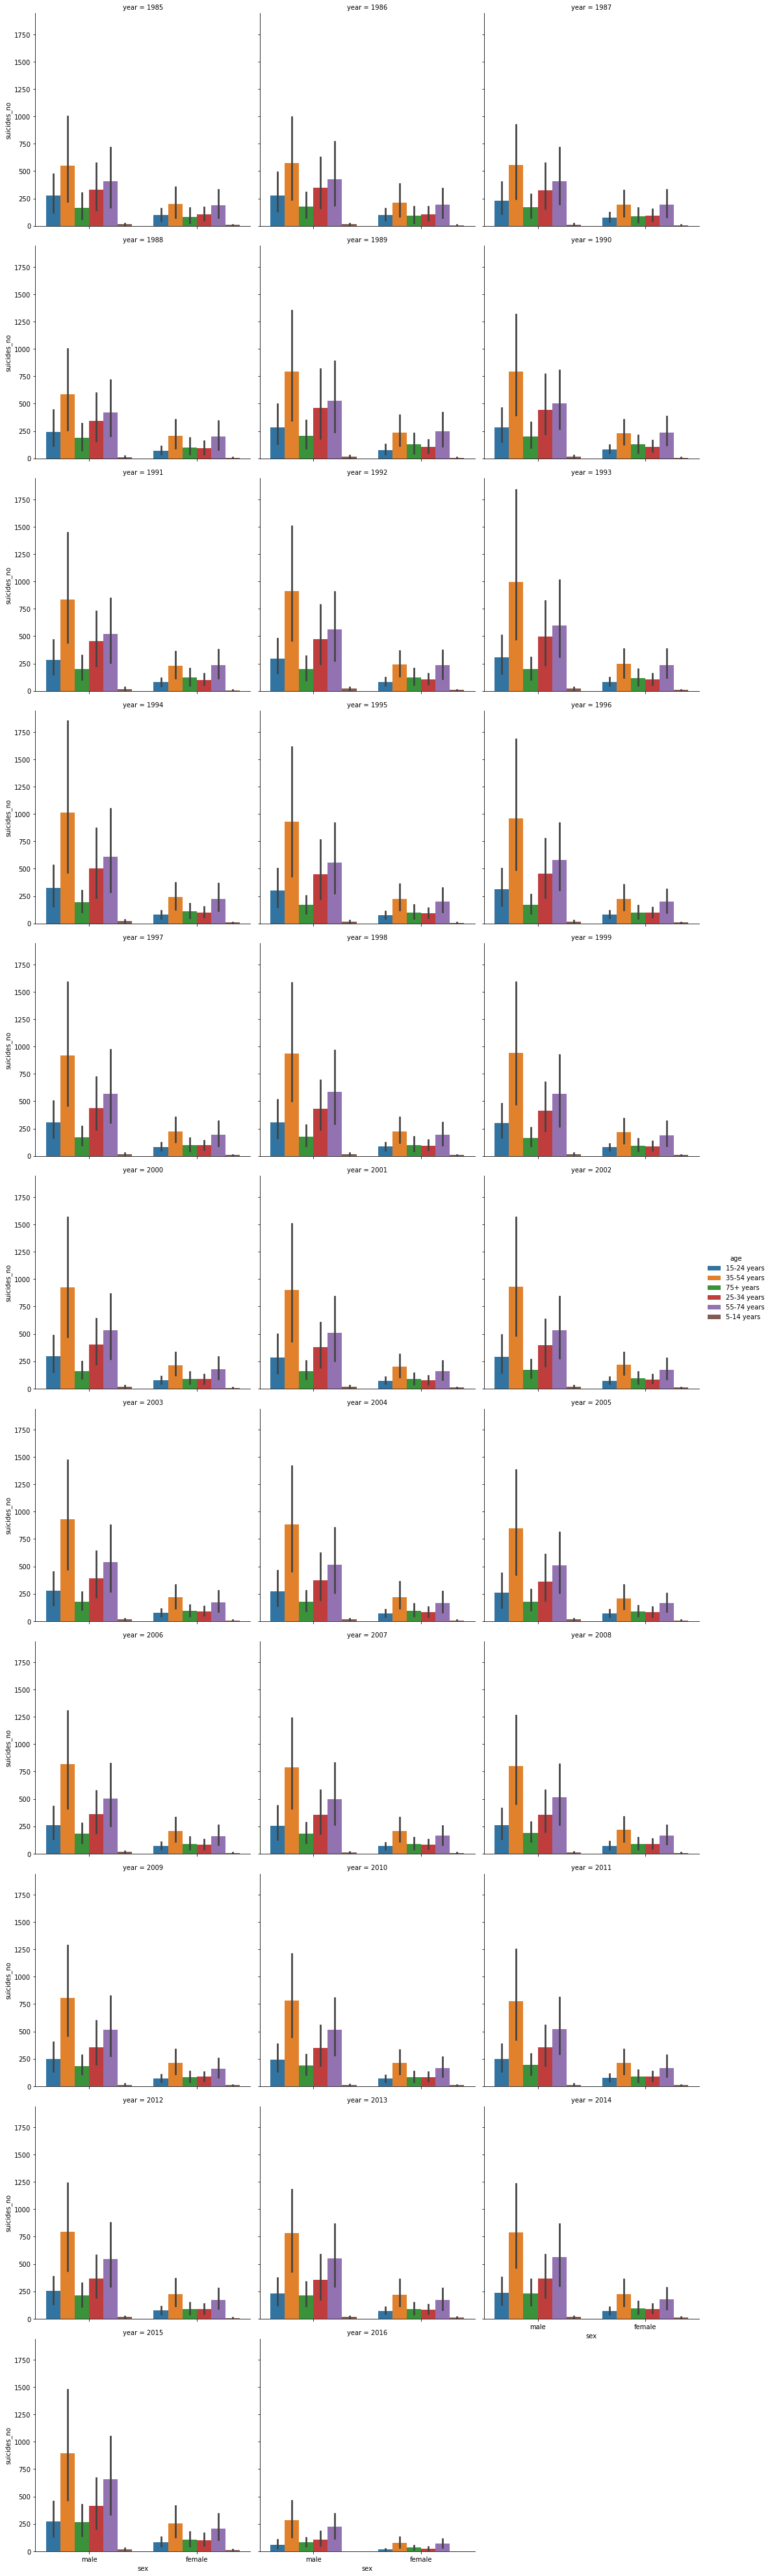

In [ ]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=dataset,kind='bar',col_wrap=3)

In [ ]:
# Finding the year with the highest suicide
df = dataset.reset_index()
df = df.drop(["index"], axis=1)
max_suicide_year = df["year"][0]
max_suicide_year 

1987

In [ ]:
data = dataset[(dataset['year']== max_suicide_year)]
data_as_99 = data.groupby(["age","sex"]).sum()["suicides_no"].reset_index()
data_as_99

,age,sex,suicides_no
0,15-24 years,female,4046
1,15-24 years,male,12386
2,25-34 years,female,4923
3,25-34 years,male,17386
4,35-54 years,female,10551
5,35-54 years,male,30098
6,5-14 years,female,271
7,5-14 years,male,664
8,55-74 years,female,10373
9,55-74 years,male,22096


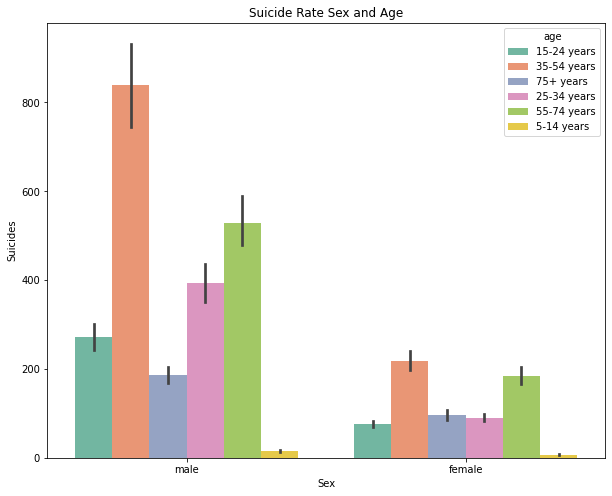

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=dataset["sex"], y=dataset["suicides_no"],hue=dataset["age"], palette=sns.color_palette("Set2"))
plt.xlabel('Sex')
plt.ylabel('Suicides')
plt.title('Suicide Rate Sex and Age')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



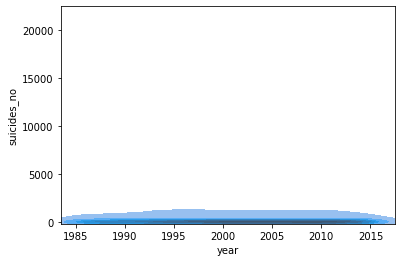

In [ ]:
sns.kdeplot(dataset.year, dataset.suicides_no, shade=True, cut=1)
plt.show()

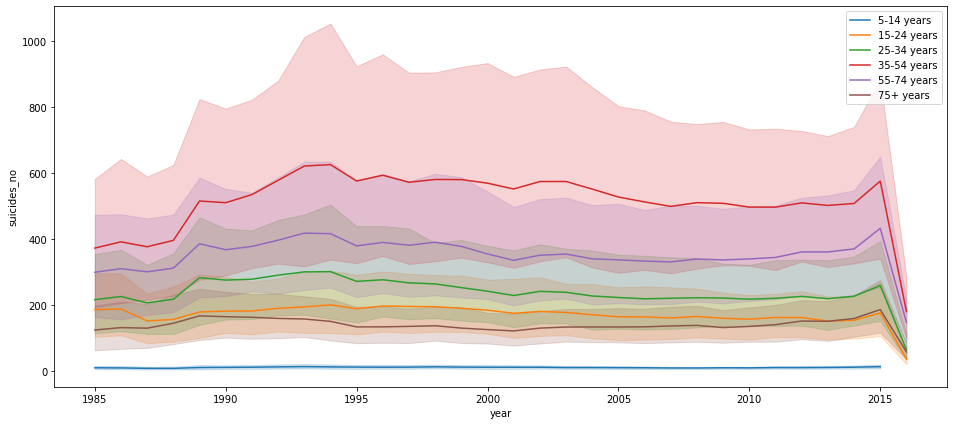

In [ ]:
#Visualizing the lineplot to see Suicides numbers according to year with age group
age_5 = dataset.loc[dataset.loc[:, 'age']=='5-14 years',:]
age_15 = dataset.loc[dataset.loc[:, 'age']=='15-24 years',:]
age_25 = dataset.loc[dataset.loc[:, 'age']=='25-34 years',:]
age_35 = dataset.loc[dataset.loc[:, 'age']=='35-54 years',:]
age_55 = dataset.loc[dataset.loc[:, 'age']=='55-74 years',:]
age_75 = dataset.loc[dataset.loc[:, 'age']=='75+ years',:]
plt.figure(figsize=(16,7))
#Now lets plot a line plot
age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

#Now make the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

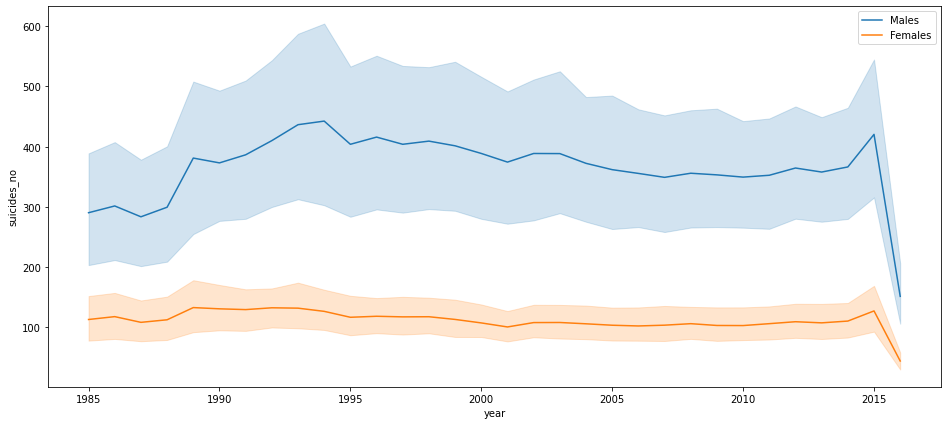

In [ ]:
#Visualizing a lineplot for a Male & Female population
male_population = dataset.loc[dataset.loc[:, 'sex']=='male',:]
female_population = dataset.loc[dataset.loc[:, 'sex']=='female',:]

# Set figure size
plt.figure(figsize=(16,7))

#Plot the Lineplot
lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

In [ ]:
group_dataset=dataset.groupby(['age','sex'])['suicides_no'].sum().unstack()
group_dataset=group_dataset.reset_index().melt(id_vars='age')

In [ ]:
group_dataset_female=group_dataset.iloc[:6,:]
group_dataset_male=group_dataset.iloc[6:,:]

In [ ]:
group_dataset_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [ ]:
group_dataset_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


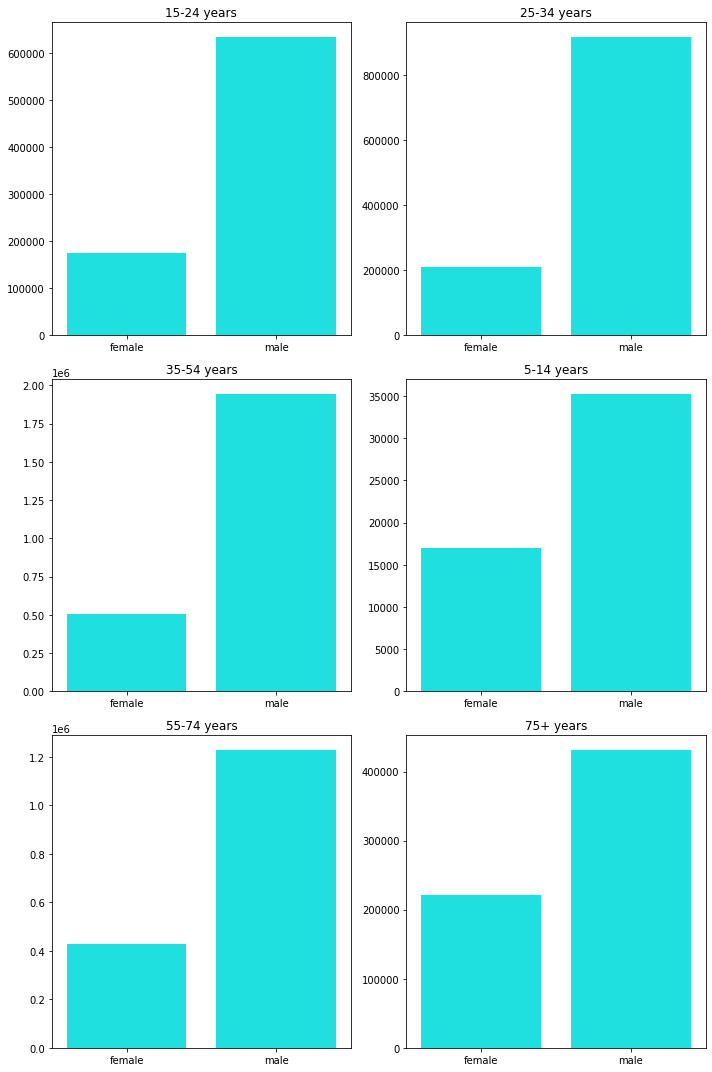

In [ ]:
# Visualizing the number of Suicides at diffrent ages by males and females
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='cyan')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

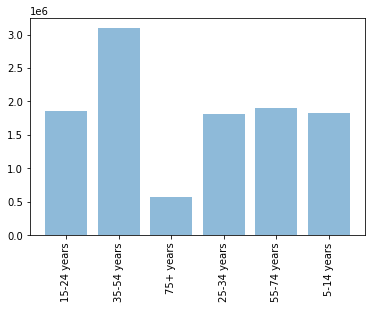

In [ ]:
index_population=[]
for age in dataset['age'].unique():
  index_population.append(sum(dataset[dataset['age']==age].population)/len(dataset[dataset['age']==age].population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

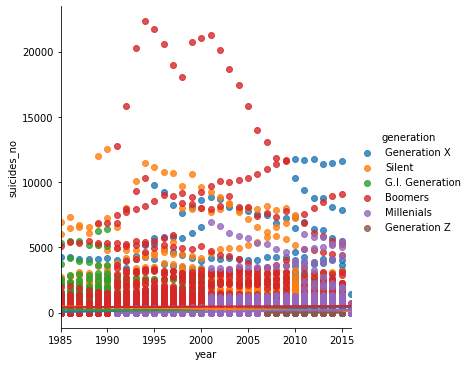

In [ ]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation",truncate=True, height=5, data=dataset)
# Use more informative axis labels than are provided by default
g.set_axis_labels("year", "suicides_no")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



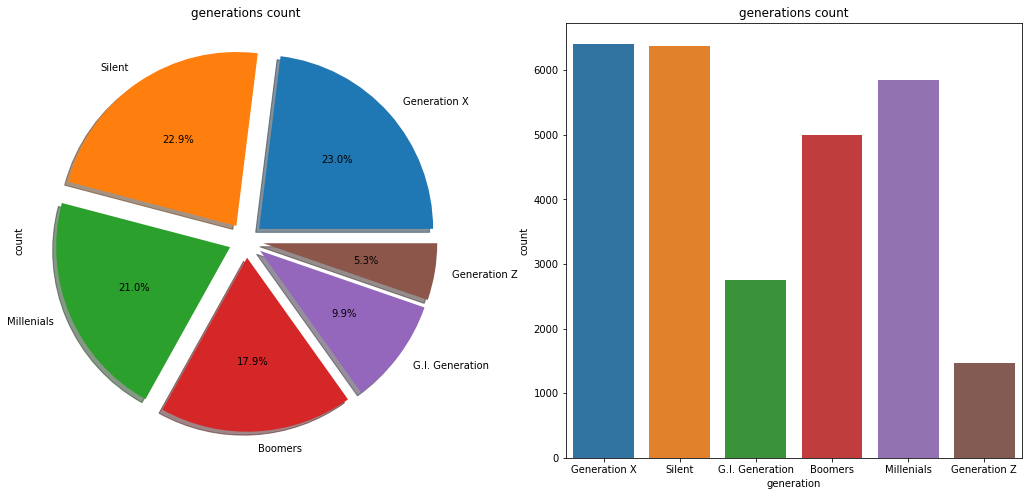

In [ ]:
# Visualizing the pie chart for the Generations vs Suicide count
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('generations count')
ax[0].set_ylabel('count')
sns.countplot('generation',data=dataset,ax=ax[1])
ax[1].set_title('generations count')
plt.show()

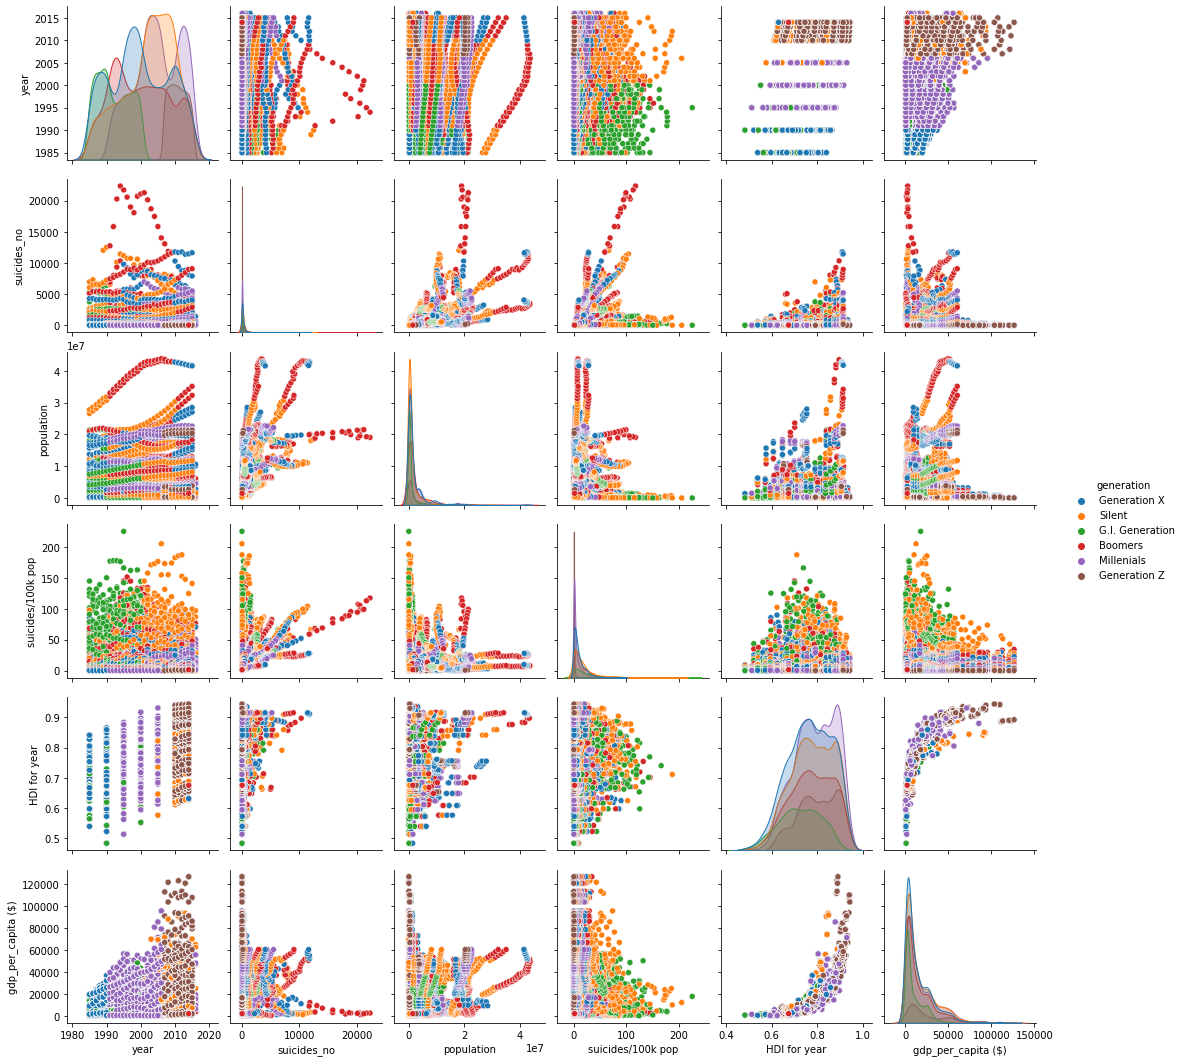

In [ ]:
sns.pairplot(dataset,hue='generation')
plt.show()

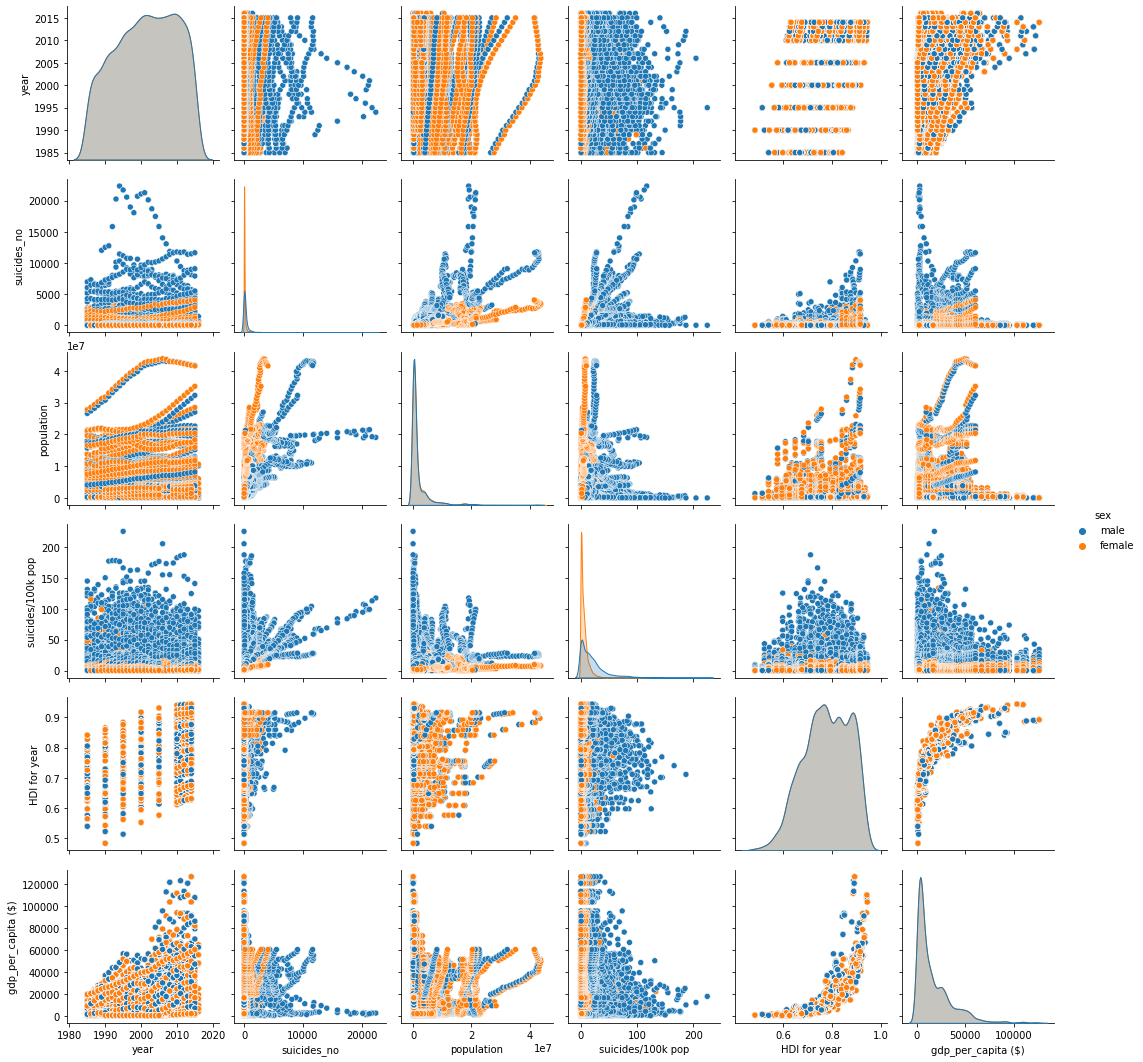

In [ ]:
sns.pairplot(dataset, hue="sex")
plt.show()

In [ ]:
x = dataset.iloc[:, [4, 5]].values
x

array([[     21,  312900],
       [     16,  308000],
       [     14,  289700],
       ...,
       [     60, 2762158],
       [     44, 2631600],
       [     21, 1438935]])

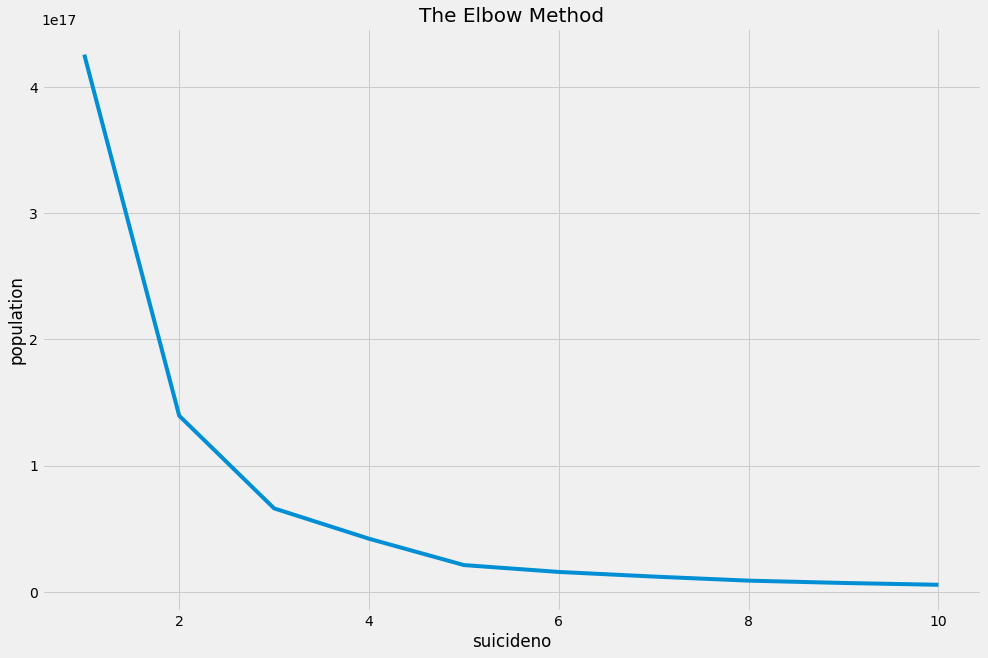

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('suicideno')
plt.ylabel('population')
plt.show()

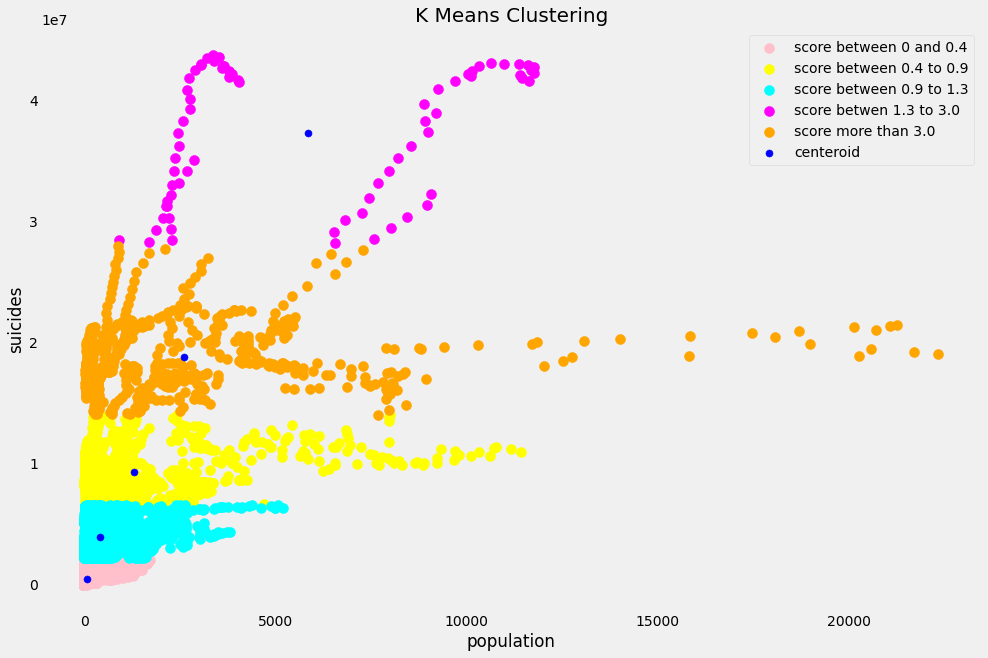

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'score between 0 and 0.4')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'score between 0.4 to 0.9')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'score between 0.9 to 1.3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'score betwen 1.3 to 3.0')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'score more than 3.0')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('population')
plt.ylabel('suicides')
plt.legend()
plt.grid()
plt.show()